<a href="https://colab.research.google.com/github/AlexanderAmaya1/MAT-421-Homework/blob/main/Module_B_Chapter17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module B: Interpolation
Alexander Amaya

## 17.1: Interpolation Problem Statement

Graph styles available:
['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Test Graph:


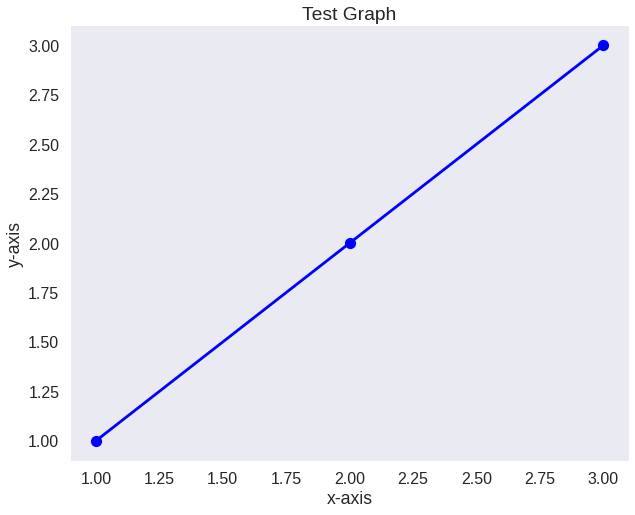

In [ ]:
import matplotlib.pyplot as plt

print("Graph styles available:")
print(plt.style.available)
print('\n')

# This creates a graph of the supplied data sets and graph attributes.
def graph_function(x_data, y_data, x_label, y_label, title):
  
  plt.style.use("seaborn-deep")
  plt.figure(figsize=(10,8))
  plt.plot(x_data, y_data, '-ob')
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label) 
  plt.show()


# Creation of Test Graph (no interpolation)
x = [1,2,3]
y = [1,2,3]


print('Test Graph:')

graph_function(x_data = x, y_data = y, x_label='x-axis', y_label='y-axis', title='Test Graph')



Interpolation is a method used to predict a new point between two of the existing points in a data set. This is a data set where the x-axis consists of independent data values and the y-axis is the dependent data values. 

In the script above, I familiarize myself with the Python graphing functionality that I will use to demonstrate interpolation in the other examples. 



---



## 17.2: Linear Interpolation

y_hat = 2.5




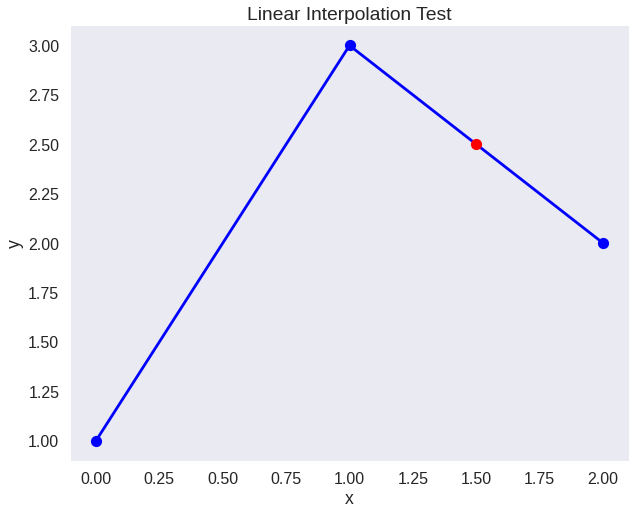

In [ ]:
from scipy.interpolate import interp1d 
import matplotlib.pyplot as plt

# This creates a graph of the supplied data sets and graph attributes.
def graph_function(x_data, y_data, x_label, y_label, title):
  
  plt.style.use("seaborn-deep")
  plt.figure(figsize=(10,8))
  plt.plot(x_data, y_data, '-ob')
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label) 
  


# This function calculates and plots the linear intepolation of the x-coordinate given a data set
def linear_interpolation(x_point, x_data, y_data):
  # Finds left point (x_i,y_i)
  i = 0
  left_point_x = 0
  left_point_y = 0
  for val in x_data:
    if val < x_point:
      left_point_x = val
      left_point_y = y_data[i]
      i += 1
    else:
      break
  #print(str(left_point_x)+', '+str(left_point_y))
  # Finds right point (x_i+1,y_i+1)
  i = 0
  right_point_x = 0
  right_point_y = 0
  for val in x_data:
    if val > x_point:
      right_point_x = val
      right_point_y = y_data[i]
      break
    else:
      i += 1

  # linear interpolation formula
  y_hat = left_point_y + ((right_point_y-left_point_y)*(x_point - left_point_x)) / (right_point_x-left_point_x)

  print("y_hat = "+str(y_hat)+"\n\n")

  # Plot it on the graph
  plt.plot(x_point, y_hat, 'ro')




# Testing using the data set from the textbook
x = [0, 1, 2]
y = [1, 3, 2]

graph_function(x,y,"x","y","Linear Interpolation Test")

linear_interpolation(1.5,x,y)




The Python example above manually implements the linear interplation function that was shown off in the textbook. 
The graph resulting graph is identical to the one in the textbook, this supports the correctness of my implementation.

This interplation function uses the following linear interpolation formula: 

$\hat{y}(x)=y_i+\frac{(y_{i+1}−y_i)(x−x_i)}{(x_{i+1} − x_i)} $



---



## 17.3: Cubic Spline Interpolation

[[-0.75]
 [ 0.  ]
 [ 2.75]
 [ 1.  ]
 [ 0.75]
 [-4.5 ]
 [ 7.25]
 [-0.5 ]]





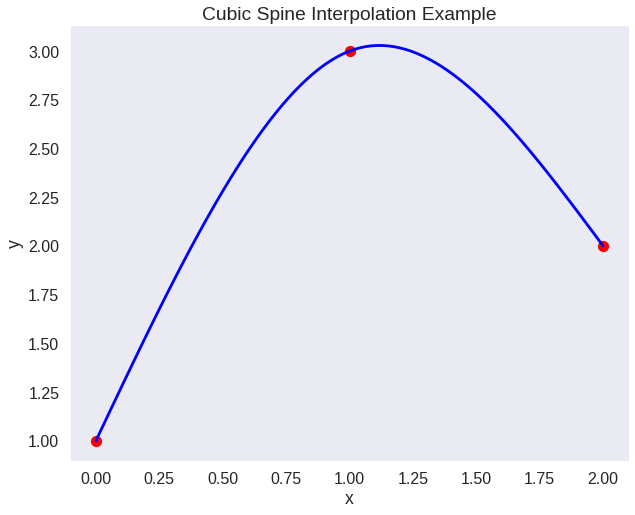

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def graph_function(x_data, y_data, x_label, y_label, title):
  
  plt.style.use("seaborn-deep")
  plt.figure(figsize=(10,8))
  plt.plot(x_data, y_data, 'ro')
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label) 
  

# Cubic Interpolation for x and y data sets
def cubic_spline_interpolation(x_data,y_data):

  # Creation of the Matricies
  b = np.array([y_data[0], y_data[1], y_data[1], y_data[2], 0, 0, 0, 0])
  b = b[:, np.newaxis]
  A = np.array([
                [x_data[0]**3, x_data[0]**2, x_data[0]**1, 1, 0, 0, 0, 0], 
                [0, 0, 0, 0, x_data[1]**3, x_data[1]**2, x_data[1]**1, 1],

                [x_data[1]**3, x_data[1]**2, x_data[1]**1, 1, 0, 0, 0, 0], \
                [0, 0, 0, 0, x_data[2]**3, x_data[2]**2, x_data[2]**1, 1], 

                [3*x_data[1]**2, 2*x_data[1], 1, 0, -3*x_data[1]**2, -2*x_data[1], -1, 0], 
                [6*x_data[1], 2, 0, 0, -6*x_data[1], -2, 0, 0],\

                [6*x_data[0], 2, 0, 0, 0, 0, 0, 0], 
                [0, 0, 0, 0, 6*x_data[2], 2, 0, 0]])

  #Solving the Matricies
  coeffs = np.dot(np.linalg.inv(A), b)
  print(coeffs)
  print('\n\n')

  # Ploting the Resulting cubic functions
  x_new1 = np.linspace(x_data[0], x_data[1], 100)
  y_new1 = coeffs[0]*x_new1**3 + coeffs[1]*x_new1**2 + coeffs[2]*x_new1 + coeffs[3]
  plt.plot(x_new1,y_new1,'b')

  x_new2 = np.linspace(x_data[1], x_data[2], 100)
  y_new2 = coeffs[4]*x_new2**3 + coeffs[5]*x_new2**2 + coeffs[6]*x_new2 + coeffs[7]
  plt.plot(x_new2,y_new2,'b')



# Testing using the data set from the textbook

x = [0,1,2]
y = [1,3,2]

graph_function(x,y,'x','y','Cubic Spline Interpolation Example')
cubic_spline_interpolation(x,y)

The following example manually implements the cubic spline interpolation function that is discussed in the text book. The graph and resulting coefficients are identical to the ones displayed in the textbook, supporting the accuracy of my example. 



---



## 17.4: Lagrange Polynomial Interpolation

The new coordinate is: (0.5, 2.375)


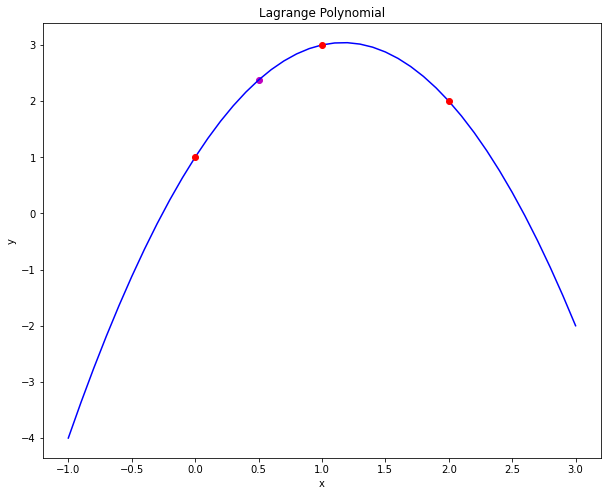

In [18]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

def graph_function(x_data, y_data, x_label, y_label, title):
  
  plt.style.use("seaborn-deep")
  plt.figure(figsize=(10,8))
  plt.plot(x_data, y_data, 'mo')
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)




# Uses the Lagrange Polynomial Interpolation Formula to Calculate the specific coordinate to plot the new point
def lagrange_interpolation(x,y, x_new):
  
  y_new = 0
  
  for i in range(0,len(y)):
    product = 1

    for j in range(0,len(y)):
      if j != i:
        product *= (x_new-x[j])/(x[i]-x[j])
        
    y_new += y[i]*product
 

  return y_new



# Calculates the new point to put on the graph
x_new = 0.5
y_new = lagrange_interpolation(x,y,x_new)

print("The new coordinate is: ("+str(x_new)+", "+str(y_new)+")")

graph_function(x_new,y_new, "x", "y", "Lagrange Polynomial")



# Displays the Plot Shown in the Book
x = [0, 1, 2]
y = [1, 3, 2]
P1_coeff = [1,-1.5,.5]
P2_coeff = [0, 2,-1]
P3_coeff = [0,-.5,.5]
x_gen= np.arange(-1.0, 3.1, 0.1)
f = lagrange(x, y)
plt.plot(x_gen, f(x_gen), 'b', x, y, 'ro')



The following example implements the lagrange polynomial formula to find the specific y coordinate for any new point that needs to be interpolated. In the example above a new point at x = 0.5 is shown in pink. The lagrange interpolation function calculated the new y coordinate. This example is plotted against the example in the book to show the accuracy of my written function. 

This is the formula implemented in my function:

$L(x)=\sum_{i=1}^{n}y_{i}P_{i}(x)$

where:

$P_{i}(x)=\prod_{j=1,j\neq  i}^{n}\frac{x-x_{j}}{x_{i}-x_{j}}$



---



## 17.5 Newton's Polynomial Interpolation

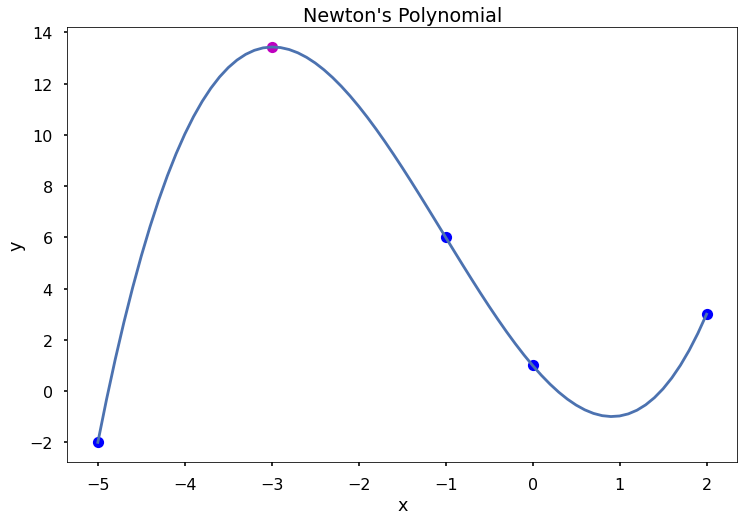

In [26]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

def graph_function(x_data, y_data, x_label, y_label, title):
  
  plt.style.use("seaborn-deep")
  plt.figure(figsize=(12,8))
  plt.plot(x_data, y_data, 'mo')
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)


# Book Function
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

# Book function
def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

# My created function
def newton_poly_at_point(x,y,new_x_point):
  coef = divided_diff(x,y)[0, :]
  result_y = newton_poly(coef,x,new_x_point)
  graph_function(new_x_point,result_y,'x','y',"Newton's Polynomial")



%matplotlib inline

x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])

# Calling the point function
newton_poly_at_point(x,y,-3)

# Book code to plot
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

#plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)






Since the book completely outlines the code needed to calculate the Newton Polynomial, I simply created a function that uses the books fucntions to plot a single interpolated point on the Newton polynomial. The point is displayed in pink. 
